<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/PROYECTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kneed

In [3]:
#0.- Librerias 

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
#from oauth2client.client import GoogleCredentials
#gc = gspread.authorize(GoogleCredentials.get_application_default())
#drive.mount('/content/drive')
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.base import TransformerMixin
import json


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Datos:**

1.   Year :   Anio de corte
2.   Month :   Mes de corte 
2.   Year&month:  Anio y mes
2.   Adsetstarttime: tiempo de inicio de config de la propaganda
2.   Adsetendtime:  tiempo de fin de la propaganda
2.   Campaignobjective:  objetivo de la campaña
2.   Campaignname:  nombre de la campaña
2.   AdsetID:  identificador de la propaganda
2.   Adsetname: nombre de la propaganda
2.   AdID: id de la propaganda
2.   Promotedposttype: tipo de post de promocion link, video, etc.
2.   Promotedpostmessage: mensaje en el post de promocion
2.   Cost: valor o costo de haber puesto la propaganda
2.   Impressions:  numero de veces que se mostro la propaganda
2.   Reach: numero de personas únicas que vieron la publicacion.
2.   Frequency: veces que ha visto la publicacion frecuencia ( Impressions / Reach )
2.   Adname: nombre de la propaganda
2.   Linkclicks: cuantas veces ha dado click en la publicación
2.   Costperon-Facebooklead : costo por lead (persona q lleno el formulario o consultaron el producto)
2.   Uniqueleads: leads que ha generado

In [320]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA.xlsx'
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
data.sample(10)
data[['Year','Month']] = data['Year & month'].str.split('|',expand=True)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data.info()

# remover espacios en el nombre de las columnas
data.columns = data.columns.str.replace(' ', '')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Campaign ID                      3031 non-null   int64  
 3   Campaign name                    3031 non-null   object 
 4   Campaign objective               3031 non-null   object 
 5   Ad set ID                        3031 non-null   int64  
 6   Ad set name                      3031 non-null   object 
 7   Ad ID                            3031 non-null   int64  
 8   Ad name                          3031 non-null   object 
 9   Promoted post type               3031 non-null   object 
 10  Promoted post created date       3031 non-null   int64  
 11  Promoted post description        2622 non-null   object 
 12  Promoted post messag

In [321]:
data.head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month
0,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN,1
1,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN,1
2,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN,1
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1
4,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN,1


In [322]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'Unknown'
filter3 = data["Campaignobjective"] == "LEAD_GENERATION"
filter4 = data.Gender != 'unknown'

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 & filter4 ]
data.tail()


,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month
3026,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,45-54,male,0.10,90,84,1.07,0,0,1.11,NaN,7
3027,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,female,0.00,2,2,1.00,0,0,0.00,NaN,7
3028,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,male,0.13,60,52,1.15,0,0,2.17,NaN,7
3029,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,female,0.01,1,1,1.00,0,0,10.00,NaN,7
3030,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,male,0.03,30,25,1.20,0,0,1.00,NaN,7


In [323]:


# Click-through-rate  Porcentaje de las impresiones que se volvieron clicks
data['CTR'] = data['Linkclicks'] / data['Impressions'] *100
data.tail()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR
3026,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,45-54,male,0.10,90,84,1.07,0,0,1.11,NaN,7,0.0
3027,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,female,0.00,2,2,1.00,0,0,0.00,NaN,7,0.0
3028,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,55-64,male,0.13,60,52,1.15,0,0,2.17,NaN,7,0.0
3029,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,female,0.01,1,1,1.00,0,0,10.00,NaN,7,0.0
3030,2021,2021|07,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848049963210753,Basica_intereses_gps_tdc_perfilAlto_Drive,23848080533630753,Basica - Drive - Ecuatorio que se respeta,link,44399,¡Empieza ahora mismo!,Ecuatoriano que se respeta no se deja ganar p...,Precio por tiempo limitado.,44396,NaN,"{""age_max"":65,""age_min"":25,""flexible_spec"":[{""...",25,65,65+,male,0.03,30,25,1.20,0,0,1.00,NaN,7,0.0


In [445]:
import warnings
warnings.filterwarnings('ignore')

data['work_positions'] = 'None'
for i in data.index:
  #if (i == 778):
    campo_json = json.loads(data.loc[i]['Adsettargeting'])
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_work_positions = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','work_positions'],errors='ignore').rename(columns={'name': 'work_positions'})['work_positions']).columns.values.tolist()

        data['work_positions'][data.index == i]= '|' + ''.join([  str( item + '|') for item in lista_work_positions ])


    except:

        
        data.loc[i]['work_positions'] = 'None' 
        
        


In [439]:
import warnings
warnings.filterwarnings('ignore')

data['intereses'] = 'None' 
data['education_statuses'] = 'None'

for i in data.index:

  #if (i == 778):
    campo_json = json.loads(data.loc[i]['Adsettargeting'])
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_intereses = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()
        lista_educacion = pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')['education_statuses'][0]

        data['intereses'][data.index == i]= '|' + ''.join([  str( item + '|') for item in lista_intereses ])
        data['education_statuses'][data.index == i] = '|' + ''.join([  str( str(item) + '|') for item in lista_educacion ])

    except:
        data.loc[i]['intereses'] = 'None' 
        data.loc[i]['education_statuses'] = 'None' 

        


In [443]:
import warnings
warnings.filterwarnings('ignore')


data['industries'] = 'None'

for i in data.index:
  #if (i == 778):
    campo_json = json.loads(data.loc[i]['Adsettargeting'])
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_industries = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','industries'],errors='ignore').rename(columns={'name': 'industries'})['industries']).columns.values.tolist()

        data['industries'][data.index == i]= '|' + ''.join([  str( item + '|') for item in lista_industries ])

    except:


        data.loc[i]['industries'] = 'None' 
        

        


In [430]:
data['education_statuses'].head()

0    |10|11|3|7|9|
1    |10|11|3|7|9|
2    |10|11|3|7|9|
3    |10|11|3|7|9|
4    |10|11|3|7|9|
Name: education_statuses, dtype: object

In [454]:

print(data[data.industries == 'None'].shape)
print(data.shape)
#data.intereses.head(10)

data[data.industries != 'None']['industries']

#data[data.intereses != 'None']

(625, 36)
(2452, 36)


0    |Arquitectura e ingeniería|Ejército (global)|F...
Name: industries, dtype: object

In [359]:
pd.get_dummies(pd.json_normalize(cuack_json,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()

['Anti-theft system',
 'Compras online',
 'Conducción',
 'Dispositivo inteligente',
 'Dispositivos GPS',
 'GPS Asistido',
 'Google Maps',
 'Security',
 'Security alarm',
 'Seguridad',
 'Sistema de alarma',
 'Smart Technologies',
 'Tarjetas de crédito',
 'Transporte',
 'Vehicle tracking system']

In [455]:
pd.get_dummies(pd.json_normalize(cuack_json,record_path=['flexible_spec','industries'],errors='ignore').rename(columns={'name': 'industries'})['industries']).columns.values.tolist()

['Arquitectura e ingeniería',
 'Ejército (global)',
 'Funcionarios del gobierno (global)',
 'Gestión',
 'Negocios y finanzas',
 'Producción',
 'Servicios administrativos',
 'Servicios de asistencia médica y sanitaria',
 'Servicios jurídicos',
 'Servicios técnicos y de TI',
 'Transporte y traslado',
 'Ventas']

In [441]:
pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')

,interests,education_statuses,industries,work_positions
0,"[{'id': '6002889757279', 'name': 'Security ala...","[10, 11, 3, 7, 9]","[{'id': '6008888954983', 'name': 'Servicios ad...","[{'id': '107402372623035', 'name': 'Doctor'}]"


Incluir el numero de palabras

In [ ]:
data['NumPalabras'] = data.Promotedpostmessage.str.split().str.len()

Borrar los que no tienen Edad

In [ ]:
#borrar los que tienen Unknown en Age
data = data[data.Age != 'Unknown']

In [ ]:
#data['Descripcion'] = data['Promotedpostdescription'] 
data['Message'] = data['Promotedpostmessage'] 
data['Caption'] = data['Promotedpostcaption'] 
#data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()
data['Rate'] = data['Uniqueleads']/data['Reach'] 

In [ ]:
data =data.dropna(subset=["Costperon-Facebooklead"])
q1= np.percentile(data["Costperon-Facebooklead"], 25)  
q2= np.percentile(data["Costperon-Facebooklead"], 50)
q3= np.percentile(data["Costperon-Facebooklead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionInt'] = 0

In [ ]:
data['Clasificacion'].loc[(data['Costperon-Facebooklead']<= q1)] = "Mejores"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = "Regulares"
data['Clasificacion'].loc[(data['Costperon-Facebooklead']> q3 )] = "Peores"


data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']<= q1)] = 2
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q1 ) & (data['Costperon-Facebooklead'] <= q3)] = 1
data['ClasificacionInt'].loc[(data['Costperon-Facebooklead']> q3 )] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A v

In [ ]:
data.head(5)

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2


# **AEDA**

In [ ]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Age', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [ ]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.express as px

fig1 = px.bar(data, x='Clasificacion', y='Uniqueleads', height=300,
              title='Stacked Bar Chart - Hover on individual items')
fig2 = px.histogram(data, x='Clasificacion', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()
fig2.show()

In [ ]:
fig1= px.histogram(data, x='Age', y='Uniqueleads', histfunc='sum', height=300,
                    title='Histogram Chart')
fig1.show()


In [ ]:
# añadir edad mediana y codigo de género para concatenarlo al Ad set ID y hacerlo unico
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Histogram(
    x=np.log(data[data.Gender=='male']['Uniqueleads']),
    name='male',
    bingroup=1))

fig.add_trace(go.Histogram(
    x=np.log(data[data.Gender=='female']['Uniqueleads']),
    name='female',
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    title="Histograma del Log de Uniqueleads",
    bargap=0.1)

fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(data, x="Uniqueleads", color="Gender", marginal="box", # can be `box`, `violin`
                         hover_data=data.columns)
fig.show()

https://rpubs.com/nicokaswalder/614266


https://www.kaggle.com/marcogdepinto/2016-presidential-elections-on-facebook


In [ ]:
data.describe()

,Year,CampaignID,AdsetID,AdID,Promotedpostcreateddate,Adsetstarttime,Adsetendtime,Targetingminimumage,Targetingmaximumage,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,NumMessage,NumCaption,Rate,ClasificacionInt
count,528.0,5.280000e+02,5.280000e+02,5.280000e+02,528.000000,528.000000,4.0,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2021.0,2.384592e+16,2.384640e+16,2.384683e+16,44334.462121,44182.142045,44364.0,22.500000,56.058712,14.279792,7709.380682,4291.581439,1.561799,43.719697,6.304924,2.293958,2.312652,4.202652,0.903995,34.920455,34.920455,5.579545,0.004445,1.001894
std,0.0,1.596364e+11,8.081269e+11,6.953520e+11,36.814455,105.349949,0.0,1.430224,9.663129,24.961888,14782.424520,7320.535104,0.442936,76.928421,11.135010,1.541729,1.743702,2.090603,1.473556,10.257654,10.257654,2.246084,0.017728,0.709114
min,2021.0,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,0.000000,1.000000,0.750000,0.020000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000232,0.000000
25%,2021.0,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.790000,810.250000,560.000000,1.240000,5.000000,1.000000,1.505000,1.180000,2.000000,0.424911,30.000000,30.000000,4.000000,0.000969,0.750000
50%,2021.0,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.880000,2601.000000,1664.000000,1.450000,14.000000,2.000000,1.925000,1.920000,4.000000,0.592220,31.000000,31.000000,5.000000,0.001609,1.000000
75%,2021.0,2.384591e+16,2.384643e+16,2.384768e+16,44363.000000,44194.000000,44364.0,23.000000,65.000000,15.162500,8027.250000,4912.750000,1.762500,44.000000,6.000000,2.730000,3.022500,6.000000,0.969167,42.000000,42.000000,7.000000,0.003026,2.000000
max,2021.0,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,567.000000,96.000000,27.500000,11.390000,7.000000,25.000000,56.000000,56.000000,9.000000,0.333333,2.000000


In [ ]:
missing_values_count = data.isnull().sum()

In [ ]:
missing_values_count[0:42]

Year                             0
Year&month                       0
CampaignID                       0
Campaignname                     0
Campaignobjective                0
AdsetID                          0
Adsetname                        0
AdID                             0
Adname                           0
Promotedposttype                 0
Promotedpostcreateddate          0
Promotedpostdescription         52
Promotedpostmessage              0
Promotedpostcaption              0
Adsetstarttime                   0
Adsetendtime                   524
Adsettargeting                   0
Targetingminimumage              0
Targetingmaximumage              0
Age                              0
Gender                           0
Cost                             0
Impressions                      0
Reach                            0
Frequency                        0
Linkclicks                       0
Uniqueleads                      0
CPM(costper1000impressions)      0
Costperon-Facebookle

Correlation Matrix



In [ ]:
numerical_columns = ["Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras","NumMessage","NumCaption","Rate"]
labels = ["ClasificacionInt"]
categorical_columns = ["Promotedposttype","Gender","Age"]
all_features = ["Promotedposttype","Gender","Age","Impressions","Linkclicks","Cost","CPM(costper1000impressions)","CTR","Reach","Frequency","NumPalabras","Uniqueleads","NumMessage","NumCaption","Rate"]



In [ ]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

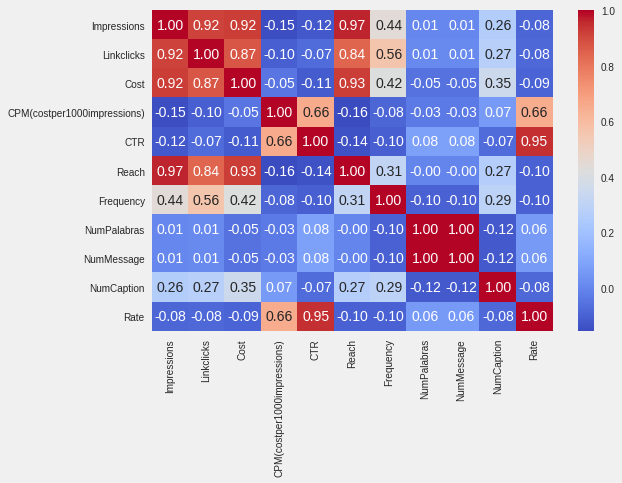

In [ ]:
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

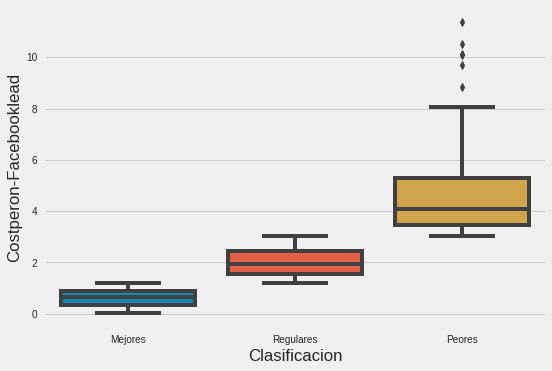

In [ ]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Clasificacion, orient="v")

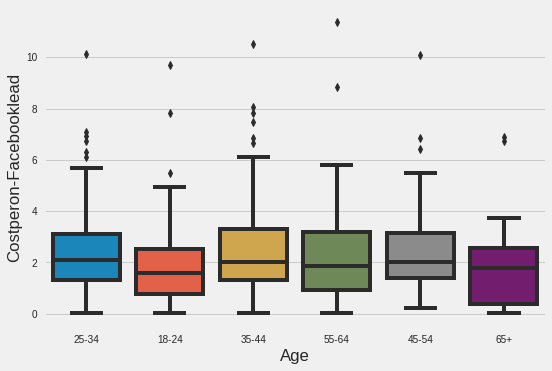

In [ ]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Age, orient="v")

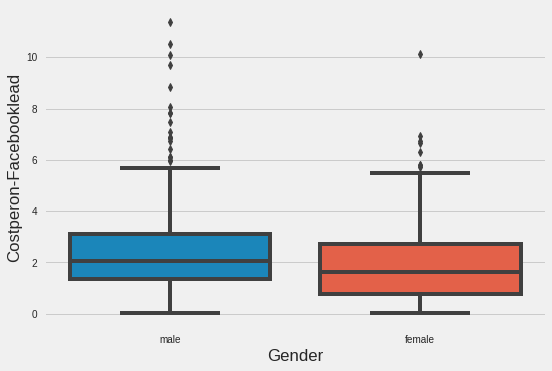

In [ ]:
 sns.boxplot(y= data["Costperon-Facebooklead"] , x= data.Gender, orient="v")

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



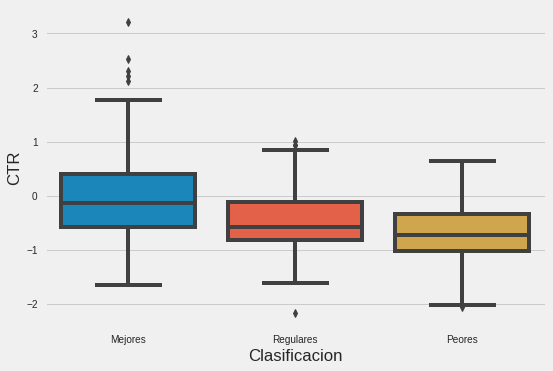

In [ ]:
 sns.boxplot(y= np.log(data["CTR"]) , x= data.Clasificacion, orient="v")

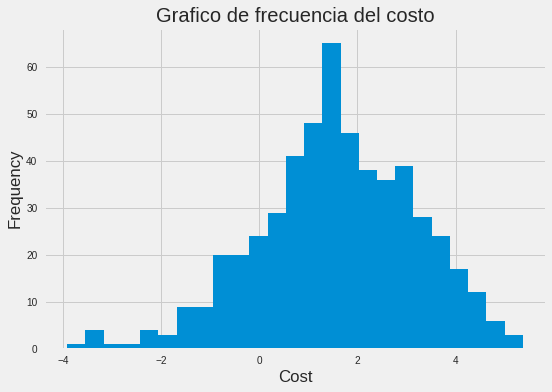

In [ ]:
plt.hist(np.log(data['Cost']), bins = 25)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.title("Grafico de frecuencia del costo")
plt.show()

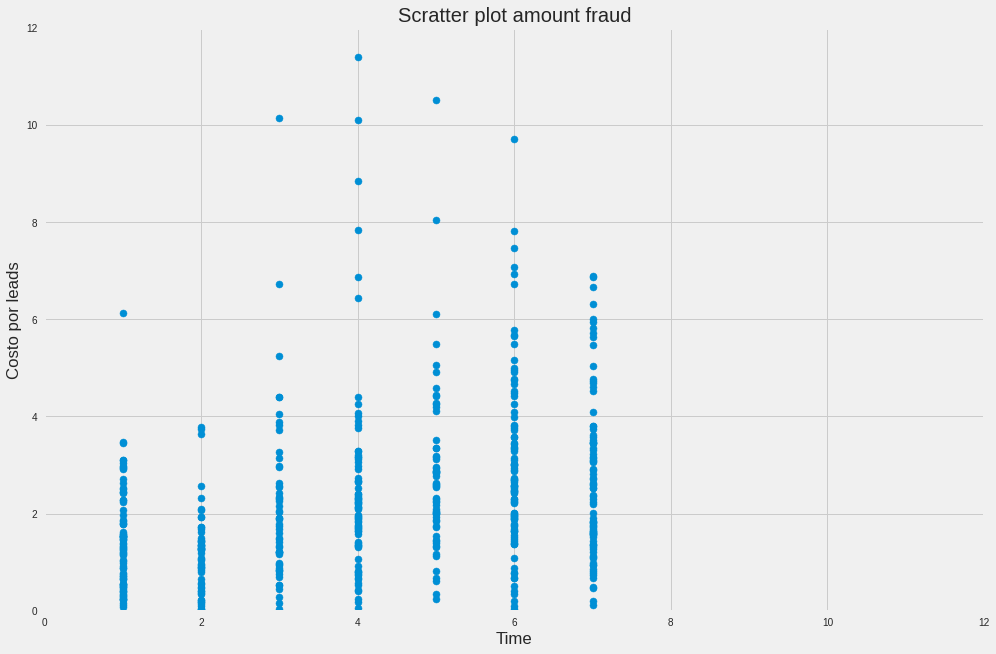

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Costperon-Facebooklead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

In [ ]:
X = data[all_features]
y = data[labels]
all_features

['Promotedposttype',
 'Gender',
 'Age',
 'Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'Uniqueleads',
 'NumMessage',
 'NumCaption',
 'Rate']

In [ ]:
#
# Create training/ test data split
#
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
X_train.shape


(369, 15)

In [ ]:
y_train.shape

(369, 1)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
prep = ColumnTransformer([('encoder', OneHotEncoder(), categorical_columns),
                   ('scaler', StandardScaler(),numerical_columns),],
                  remainder= 'drop')

In [ ]:
numerical_columns

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

In [ ]:
prep


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('encoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['Promotedposttype', 'Gender', 'Age']),
                                ('scaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['Impressions', 'Linkclicks', 'Cost',
                                  'CPM(costper1000impressions)', 'CTR', 'Reach',
                                  'Frequency', 'NumPalabras', 'NumMessage',
                                  'NumCaption', 'Rate'])],
            

### Croosvalidacion

In [ ]:
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=123)

In [ ]:
cv

RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123)

# CLASIFICACION


## Random Forest

In [ ]:
model = RandomForestClassifier()


In [ ]:
X_train.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,Uniqueleads,NumMessage,NumCaption,Rate
98,link,female,18-24,505,3,0.47,0.93,0.594059,232,2.18,46,2,46,4,0.008621
1035,link,male,35-44,3338,18,7.41,2.22,0.539245,2992,1.12,39,2,39,4,0.000668
1620,link,male,45-54,202,1,0.53,2.62,0.495050,178,1.13,26,1,26,4,0.005618
2640,link,male,65+,3686,42,13.76,3.73,1.139447,2673,1.38,31,2,31,9,0.000748
1819,link,female,35-44,5314,24,15.89,2.99,0.451637,3520,1.51,31,5,31,9,0.001420


In [ ]:
y_train

,ClasificacionInt
98,2
1035,0
1620,2
2640,0
1819,0
...,...
2962,0
1422,2
1826,0
42,2


In [ ]:
X_train_cp = X_train.copy()

X_train_cp = X_train_cp.drop('Uniqueleads',1)

In [ ]:
grid = {'n_estimators' : [200], 'max_depth' : [3,4] , 'random_state' : [123]}

In [ ]:
test_scores = []
#
for g in ParameterGrid(grid) :
  print(g)
  model.set_params(**g)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

  
  reglog.fit(X_train_cp, y_train)

  test_scores.append(reglog.score(X_test,y_test))
  
  best_idx = np.argmax(test_scores)
  print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

{'max_depth': 3, 'n_estimators': 200, 'random_state': 123}


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7484276729559748 {'random_state': 123, 'n_estimators': 200, 'max_depth': 3}
{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}
0.7610062893081762 {'random_state': 123, 'n_estimators': 200, 'max_depth': 4}


/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



Ver el mejor parametro para usarlo en un entrnamiento del modelo

In [ ]:
ParameterGrid(grid)[best_idx]

{'max_depth': 4, 'n_estimators': 200, 'random_state': 123}

In [ ]:
  model = RandomForestClassifier(max_depth= 4, n_estimators = 200, random_state= 123)
  reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])

In [ ]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Promotedposttype', 'Gender',
                                                   'Age']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
         

In [ ]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.8211382113821138

Graficar los features importantes

In [ ]:
# sacar los nombres de los dummies
feature_names = reglog.named_steps["preproc"].named_transformers_["encoder"].get_feature_names()

In [ ]:
#ver los nombres de las columnas para sacar solo los numericos
# se puede automatizar mejor viendo los tipos de datos de las columnas
X_train_cp.columns

Index(['Promotedposttype', 'Gender', 'Age', 'Impressions', 'Linkclicks',
       'Cost', 'CPM(costper1000impressions)', 'CTR', 'Reach', 'Frequency',
       'NumPalabras', 'NumMessage', 'NumCaption', 'Rate'],
      dtype='object')

In [ ]:
feature_names = np.append( feature_names, values=['Impressions', 'Linkclicks',
       'Cost', 'CPM(costper1000impressions)', 'CTR', 'Reach', 'Frequency',
       'NumPalabras', 'NumMessage', 'NumCaption', 'Rate'])

In [ ]:
importances = reglog.named_steps["regLog"].feature_importances_
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))


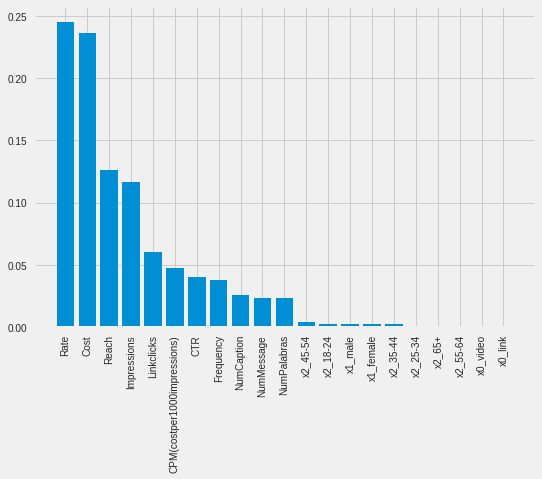

In [ ]:
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

Fin graficar los features importantes

In [ ]:

sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))
labels = np.array(feature_names)

In [ ]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 49,  43,   0],
       [  4, 180,   0],
       [  0,  19,  74]])

In [ ]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.92      0.53      0.68        92
           1       0.74      0.98      0.85       184
           2       1.00      0.80      0.89        93

    accuracy                           0.82       369
   macro avg       0.89      0.77      0.80       369
weighted avg       0.85      0.82      0.81       369



In [ ]:
X_test.head()

,Promotedposttype,Gender,Age,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,Uniqueleads,NumMessage,NumCaption,Rate
2630,link,female,35-44,7413,42,34.31,4.63,0.566572,5042,1.47,31,6,31,9,0.001190
2511,link,male,25-34,1792,6,4.97,2.77,0.334821,1575,1.14,46,2,46,4,0.001270
1926,link,male,25-34,1207,7,1.98,1.64,0.579950,1027,1.18,30,1,30,7,0.000974
2810,link,female,25-34,2644,13,5.79,2.19,0.491679,1600,1.65,31,2,31,9,0.001250
2228,link,female,45-54,185,4,0.68,3.68,2.162162,132,1.40,31,2,31,9,0.015152


In [ ]:
X_test_cp = X_test.copy()
X_test_cp = X_test_cp.drop('Uniqueleads',1)
y_pred=reglog.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



In [ ]:
X_test_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
dtype: object

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7610062893081762


In [ ]:
y_test.head()

,ClasificacionInt
2630,0
2511,1
1926,1
2810,1
2228,2


In [ ]:
evaluate_pd = X_test.copy()

In [ ]:
evaluate_pd['y_test'] = y_test.ClasificacionInt

In [ ]:
evaluate_pd['y_pred'] = y_pred

In [ ]:
evaluate_pd.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
Uniqueleads                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
y_test                           int64
y_pred                           int64
dtype: object

In [ ]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_test",
                 size='Cost', hover_data=['Frequency'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(evaluate_pd, x="Cost", y="Uniqueleads", color="y_pred",
                 size='Cost', hover_data=['Frequency'])
fig.show()

## Logistic regression multinomial

In [ ]:
X_train_cp.dtypes

Promotedposttype                object
Gender                          object
Age                             object
Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
dtype: object

In [ ]:
X_train_cp.shape

(369, 14)

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

reglog = Pipeline([('preproc', prep),
                  ('regLog', model)])


In [ ]:
reglog.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Pipeline(memory=None,
         steps=[('preproc',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Promotedposttype', 'Gender',
                                                   'Age']),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
         

In [ ]:
metrics.accuracy_score(y_train, reglog.predict(X_train_cp))

0.7317073170731707

In [ ]:
confusion_matrix(y_train, reglog.predict(X_train_cp))

array([[ 38,  54,   0],
       [ 14, 166,   4],
       [  0,  27,  66]])

In [ ]:
print( classification_report(y_train, reglog.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.73      0.41      0.53        92
           1       0.67      0.90      0.77       184
           2       0.94      0.71      0.81        93

    accuracy                           0.73       369
   macro avg       0.78      0.67      0.70       369
weighted avg       0.75      0.73      0.72       369



In [ ]:
metrics.accuracy_score(y_test, reglog.predict(X_test_cp))

0.6226415094339622

In [ ]:
print( classification_report(y_test, reglog.predict(X_test_cp)) )

              precision    recall  f1-score   support

           0       0.48      0.35      0.41        40
           1       0.59      0.77      0.67        79
           2       0.89      0.60      0.72        40

    accuracy                           0.62       159
   macro avg       0.65      0.57      0.60       159
weighted avg       0.64      0.62      0.62       159



In [ ]:
y_pred = reglog.predict(X_test_cp)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_predict_prob = reglog.predict_proba(X_test_cp)

In [ ]:
y_predict_prob[0]

array([0.67682211, 0.32008495, 0.00309295])

In [ ]:
# Revision de una variable contra la otra

### Elastic Net

In [ ]:
enet_pipe = Pipeline([('preproc', prep),
                  ('regLog', LogisticRegression(penalty= 'elasticnet', solver= 'saga', 
                                                max_iter=500))])

In [ ]:
enet_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preproc', 'regLog', 'preproc__n_jobs', 'preproc__remainder', 'preproc__sparse_threshold', 'preproc__transformer_weights', 'preproc__transformers', 'preproc__verbose', 'preproc__encoder', 'preproc__scaler', 'preproc__encoder__categories', 'preproc__encoder__drop', 'preproc__encoder__dtype', 'preproc__encoder__handle_unknown', 'preproc__encoder__sparse', 'preproc__scaler__copy', 'preproc__scaler__with_mean', 'preproc__scaler__with_std', 'regLog__C', 'regLog__class_weight', 'regLog__dual', 'regLog__fit_intercept', 'regLog__intercept_scaling', 'regLog__l1_ratio', 'regLog__max_iter', 'regLog__multi_class', 'regLog__n_jobs', 'regLog__penalty', 'regLog__random_state', 'regLog__solver', 'regLog__tol', 'regLog__verbose', 'regLog__warm_start'])

In [ ]:
enet_grid = dict(
regLog__C = [1e-9, 1e-5, 1e-1,0.001, 0.01, 0.1, 1.0],
regLog__l1_ratio = [0.0001,0.1, 0.5, 0.9] ) 

In [ ]:
enet_tuned = GridSearchCV(enet_pipe, enet_grid, cv=cv, n_jobs=-1)

In [ ]:
enet_tuned.fit(X_train_cp, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=123),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preproc',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                         

In [ ]:
metrics.accuracy_score(y_train, enet_tuned.predict(X_train_cp))

0.7344173441734417

In [ ]:
print( classification_report(y_train, enet_tuned.predict(X_train_cp)) )

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        92
           1       0.67      0.90      0.77       184
           2       0.97      0.72      0.83        93

    accuracy                           0.73       369
   macro avg       0.78      0.68      0.71       369
weighted avg       0.76      0.73      0.72       369



In [ ]:
metrics.accuracy_score(y_test, enet_tuned.predict(X_test_cp))

0.6226415094339622

In [ ]:
print( classification_report(y_test, enet_tuned.predict(X_test_cp)) )

              precision    recall  f1-score   support

           0       0.46      0.33      0.38        40
           1       0.59      0.78      0.67        79
           2       0.92      0.60      0.73        40

    accuracy                           0.62       159
   macro avg       0.66      0.57      0.59       159
weighted avg       0.64      0.62      0.61       159



In [ ]:
# ver visualmente los resultados de la clasificacion

# Clusterizacion

https://www.kaggle.com/prashant111/k-means-clustering-with-python

In [ ]:
list_cols = numerical_columns
list_cols

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

In [ ]:
# Select the ones you want
df_features = data[list_cols]

In [ ]:
df_features.head(10)

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate
3,226,3,0.32,1.42,1.327434,193,1.17,25,25,6,0.005181
13,4608,14,4.60,1.00,0.303819,2525,1.82,48,48,2,0.001188
15,1749,4,3.67,2.10,0.228702,1172,1.49,48,48,2,0.001706
16,15951,73,21.01,1.32,0.457652,9362,1.70,48,48,2,0.000855
18,795,10,1.94,2.44,1.257862,516,1.54,48,48,2,0.005814
19,6530,47,12.41,1.90,0.719755,4069,1.60,48,48,2,0.003441
22,2849,15,2.72,0.96,0.526501,2012,1.42,40,40,4,0.000497
24,985,3,1.79,1.82,0.304569,796,1.24,40,40,4,0.001256
25,8584,48,10.31,1.20,0.559180,6173,1.39,40,40,4,0.001134
28,2202,11,3.59,1.63,0.499546,1672,1.32,40,40,4,0.001196


In [ ]:
df_features.shape

(528, 11)

## **EDA**

Revisar la matriz de distancias (pendiente la version en Python)

Revisar la correlacion de las variables

In [ ]:
df_features.dtypes

Impressions                      int64
Linkclicks                       int64
Cost                           float64
CPM(costper1000impressions)    float64
CTR                            float64
Reach                            int64
Frequency                      float64
NumPalabras                      int64
NumMessage                       int64
NumCaption                       int64
Rate                           float64
dtype: object

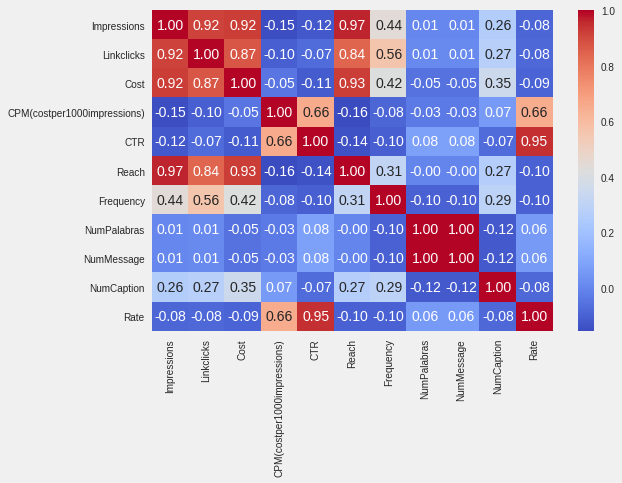

In [ ]:
g=sns.heatmap(df_features[list_cols].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

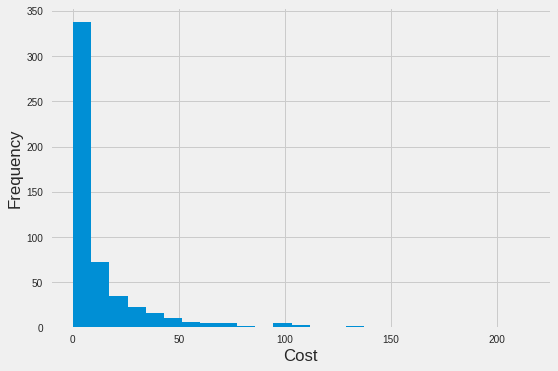

In [ ]:
# histograma del costo  pagado por la publicacion
plt.hist(df_features['Cost'], bins = 25)
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()

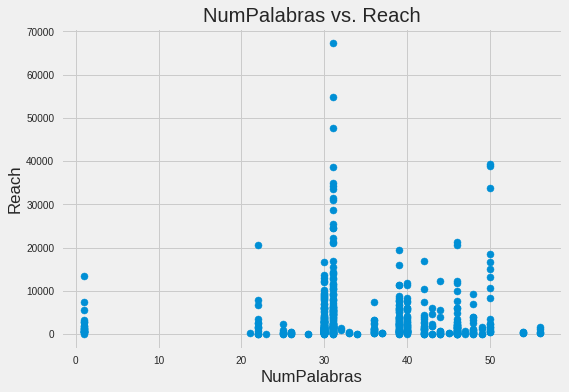

In [ ]:
# Revisar la relación entre el numero de palabras de la publicación y los anuncios visualizados
plt.scatter(df_features["NumPalabras"], df_features["Reach"])
plt.title("NumPalabras vs. Reach")
plt.xlabel("NumPalabras")
plt.ylabel("Reach")
plt.show()

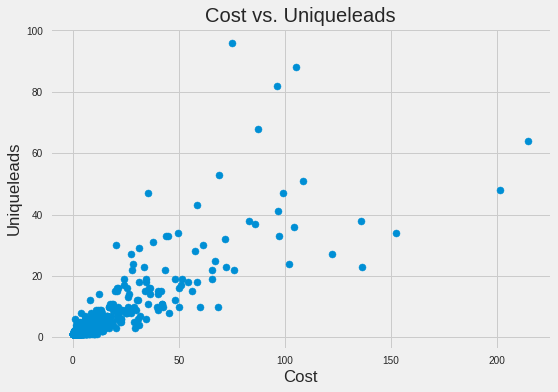

In [ ]:
plt.scatter(data["Cost"], data["Uniqueleads"])
plt.title("Cost vs. Uniqueleads")
plt.xlabel("Cost")
plt.ylabel("Uniqueleads")
plt.show()

In [ ]:
fig = px.histogram(df_features,x='Cost',nbins=25,title='Histograma',)
fig.show()

Poner en escala estandar la data

In [ ]:
df_features.dtypes
df_features.shape
df_features

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate
3,226,3,0.32,1.42,1.327434,193,1.17,25,25,6,0.005181
13,4608,14,4.60,1.00,0.303819,2525,1.82,48,48,2,0.001188
15,1749,4,3.67,2.10,0.228702,1172,1.49,48,48,2,0.001706
16,15951,73,21.01,1.32,0.457652,9362,1.70,48,48,2,0.000855
18,795,10,1.94,2.44,1.257862,516,1.54,48,48,2,0.005814
...,...,...,...,...,...,...,...,...,...,...,...
2968,1469,16,3.15,2.15,1.089176,1169,1.26,31,31,9,0.001711
3006,3343,7,4.93,1.47,0.209393,2442,1.37,36,36,4,0.001229
3009,950,3,1.44,1.52,0.315789,760,1.25,36,36,4,0.001316
3019,73,1,0.11,1.51,1.369863,64,1.14,42,42,4,0.015625


In [ ]:
data_cp = data.copy()
data_cp.shape

(528, 39)

In [ ]:
a = pd.get_dummies(data_cp['Gender'], prefix = "Gender_")
b = pd.get_dummies(data_cp['Age'], prefix = "Age_")
c = pd.get_dummies(data_cp['Clasificacion'], prefix = "Clasificacion_")

In [ ]:
frames = [df_features,a,b,c]
frames

df = pd.concat(frames, axis = 1)
df.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,Gender__female,Gender__male,Age__18-24,Age__25-34,Age__35-44,Age__45-54,Age__55-64,Age__65+,Clasificacion__Mejores,Clasificacion__Peores,Clasificacion__Regulares
3,226,3,0.32,1.42,1.327434,193,1.17,25,25,6,0.005181,0,1,0,1,0,0,0,0,1,0,0
13,4608,14,4.60,1.00,0.303819,2525,1.82,48,48,2,0.001188,0,1,1,0,0,0,0,0,0,0,1
15,1749,4,3.67,2.10,0.228702,1172,1.49,48,48,2,0.001706,1,0,0,1,0,0,0,0,0,0,1
16,15951,73,21.01,1.32,0.457652,9362,1.70,48,48,2,0.000855,0,1,0,1,0,0,0,0,0,0,1
18,795,10,1.94,2.44,1.257862,516,1.54,48,48,2,0.005814,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.columns


Index(['Impressions', 'Linkclicks', 'Cost', 'CPM(costper1000impressions)',
       'CTR', 'Reach', 'Frequency', 'NumPalabras', 'NumMessage', 'NumCaption',
       'Rate', 'Gender__female', 'Gender__male', 'Age__18-24', 'Age__25-34',
       'Age__35-44', 'Age__45-54', 'Age__55-64', 'Age__65+',
       'Clasificacion__Mejores', 'Clasificacion__Peores',
       'Clasificacion__Regulares'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
df_scaled_features = pd.DataFrame(data=scaled_features, columns=df.columns)

In [ ]:
df_scaled_features.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,Gender__female,Gender__male,Age__18-24,Age__25-34,Age__35-44,Age__45-54,Age__55-64,Age__65+,Clasificacion__Mejores,Clasificacion__Peores,Clasificacion__Regulares
0,-0.506715,-0.529821,-0.559775,-0.567407,0.287631,-0.560406,-0.885390,-0.968044,-0.968044,0.187372,0.041570,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219
1,-0.210001,-0.386696,-0.388151,-0.840086,-0.407683,-0.241547,0.583483,1.276310,1.276310,-1.595194,-0.183895,-0.638749,0.638749,2.007130,-0.716166,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
2,-0.403590,-0.516810,-0.425443,-0.125925,-0.458709,-0.426545,-0.162252,1.276310,1.276310,-1.595194,-0.154627,1.565561,-1.565561,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
3,0.558057,0.380978,0.269875,-0.632330,-0.303189,0.693286,0.312307,1.276310,1.276310,-1.595194,-0.202731,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
4,-0.468187,-0.438741,-0.494814,0.094816,0.240373,-0.516241,-0.049262,1.276310,1.276310,-1.595194,0.077288,1.565561,-1.565561,-0.498224,-0.716166,1.625232,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219


In [ ]:
df_scaled_features.shape

(528, 22)

In [ ]:
df_scaled_features.head(5)

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,Gender__female,Gender__male,Age__18-24,Age__25-34,Age__35-44,Age__45-54,Age__55-64,Age__65+,Clasificacion__Mejores,Clasificacion__Peores,Clasificacion__Regulares
0,-0.506715,-0.529821,-0.559775,-0.567407,0.287631,-0.560406,-0.885390,-0.968044,-0.968044,0.187372,0.041570,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219
1,-0.210001,-0.386696,-0.388151,-0.840086,-0.407683,-0.241547,0.583483,1.276310,1.276310,-1.595194,-0.183895,-0.638749,0.638749,2.007130,-0.716166,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
2,-0.403590,-0.516810,-0.425443,-0.125925,-0.458709,-0.426545,-0.162252,1.276310,1.276310,-1.595194,-0.154627,1.565561,-1.565561,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
3,0.558057,0.380978,0.269875,-0.632330,-0.303189,0.693286,0.312307,1.276310,1.276310,-1.595194,-0.202731,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795
4,-0.468187,-0.438741,-0.494814,0.094816,0.240373,-0.516241,-0.049262,1.276310,1.276310,-1.595194,0.077288,1.565561,-1.565561,-0.498224,-0.716166,1.625232,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219


In [ ]:
df_scaled_features.values

array([[-0.50671507, -0.52982125, -0.55977455, ...,  1.72334698,
        -0.57735027, -0.99621927],
       [-0.21000085, -0.38669558, -0.38815057, ..., -0.5802662 ,
        -0.57735027,  1.00379508],
       [-0.40358961, -0.51680982, -0.4254427 , ..., -0.5802662 ,
        -0.57735027,  1.00379508],
       ...,
       [-0.45769154, -0.52982125, -0.5148636 , ..., -0.5802662 ,
        -0.57735027,  1.00379508],
       [-0.51707502, -0.5558441 , -0.56819536, ...,  1.72334698,
        -0.57735027, -0.99621927],
       [-0.49473004, -0.52982125, -0.55295771, ...,  1.72334698,
        -0.57735027, -0.99621927]])

## Usando K-means

Metodo de Elbow para Escoger el número de clusters

In [ ]:
kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }

In [ ]:
  ...: # Una lista de valores para WSSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(df_scaled_features.values)
   ...:     sse.append(kmeans.inertia_)
   ...:     print('WSS '+ str(k) + ':' + str(kmeans.inertia_) )

WSS 1:11616.0
WSS 2:10128.194066284163
WSS 3:9009.290216322514
WSS 4:8370.256924191344
WSS 5:7864.7136416877565
WSS 6:7214.709095701208
WSS 7:6781.235316638997
WSS 8:6148.374888673976
WSS 9:5678.045934727474
WSS 10:5394.32146121509


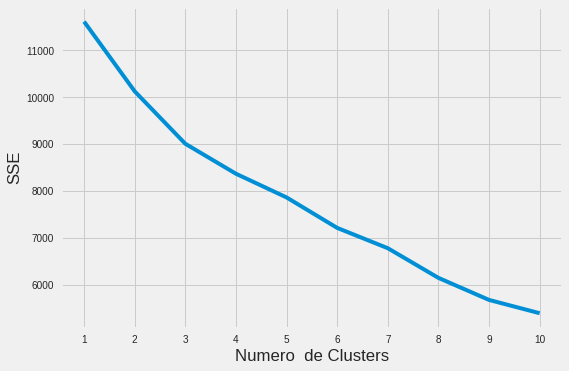

In [ ]:
# Metodo del codo  en otros se llama wss

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Numero  de Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

3

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [ ]:
y_kmeans = kmeans.fit(scaled_features)

In [ ]:
# The lowest SSE value
   ...: kmeans.inertia_

9009.290216322514

In [ ]:
 # Final locations of the centroid
   ...: kmeans.cluster_centers_

array([[-0.17717815, -0.17117908, -0.19767881, -0.11002855, -0.07534675,
        -0.15303159, -0.14294124,  0.02195564,  0.02195564, -0.19074807,
        -0.09610024, -0.63874878,  0.63874878,  0.08635879, -0.07601764,
        -0.05855928, -0.016971  ,  0.06350006,  0.09602106, -0.07067904,
         0.01749546,  0.04621245],
       [ 2.54272734,  2.64005081,  2.61717612, -0.19719688, -0.18269374,
         2.44486038,  1.33926267, -0.04211245, -0.04211245,  0.81127011,
        -0.14295405, -0.63874878,  0.63874878, -0.27552567,  0.31660679,
         0.08175667,  0.06309732, -0.25400025, -0.18786729, -0.42669199,
         0.24377011,  0.15934458],
       [-0.36571202, -0.40727574, -0.34339163,  0.29531555,  0.21624605,
        -0.38900845, -0.08559616, -0.03496929, -0.03496929,  0.17280855,
         0.24932033,  1.56556073, -1.56556073, -0.1052271 ,  0.07083997,
         0.10225824,  0.01804609, -0.06225496, -0.15184916,  0.27794263,
        -0.1094324 , -0.14653997]])

In [ ]:
# The number of iterations required to converge
   ...: kmeans.n_iter_

27

In [ ]:
df_scaled_features_new = df_scaled_features.copy()

In [ ]:
df_features_new = df_features.copy()

In [ ]:
df_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)
data['labels'] = y_kmeans.fit_predict(scaled_features)

In [ ]:
df_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,labels
3,226,3,0.32,1.42,1.327434,193,1.17,25,25,6,0.005181,0
13,4608,14,4.60,1.00,0.303819,2525,1.82,48,48,2,0.001188,0
15,1749,4,3.67,2.10,0.228702,1172,1.49,48,48,2,0.001706,2
16,15951,73,21.01,1.32,0.457652,9362,1.70,48,48,2,0.000855,0
18,795,10,1.94,2.44,1.257862,516,1.54,48,48,2,0.005814,2


In [ ]:
data.head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt,labels
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2,0
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1,0
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1,2
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1,0
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2,2


Datos agrupados por cluster

In [ ]:
cluster_agg =df_features_new.groupby("labels")
cluster_agg.agg(func="mean")


,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate
labels,,,,,,,,,,,
0,5092.739394,30.563636,9.350030,2.124485,0.793072,3172.369697,1.498545,35.145455,35.145455,5.151515,0.002743
1,45261.444444,246.622222,79.547556,1.990222,0.635040,22172.311111,2.154444,34.488889,34.488889,7.400000,0.001913
2,2308.392157,12.418301,5.716209,2.748824,1.222343,1446.529412,1.523922,34.562092,34.562092,5.967320,0.008861


In [ ]:
df_scaled_features_new['labels']  =  y_kmeans.fit_predict(scaled_features)

In [ ]:
df_scaled_features_new.head()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,Gender__female,Gender__male,Age__18-24,Age__25-34,Age__35-44,Age__45-54,Age__55-64,Age__65+,Clasificacion__Mejores,Clasificacion__Peores,Clasificacion__Regulares,labels
0,-0.506715,-0.529821,-0.559775,-0.567407,0.287631,-0.560406,-0.885390,-0.968044,-0.968044,0.187372,0.041570,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219,0
1,-0.210001,-0.386696,-0.388151,-0.840086,-0.407683,-0.241547,0.583483,1.276310,1.276310,-1.595194,-0.183895,-0.638749,0.638749,2.007130,-0.716166,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795,0
2,-0.403590,-0.516810,-0.425443,-0.125925,-0.458709,-0.426545,-0.162252,1.276310,1.276310,-1.595194,-0.154627,1.565561,-1.565561,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795,2
3,0.558057,0.380978,0.269875,-0.632330,-0.303189,0.693286,0.312307,1.276310,1.276310,-1.595194,-0.202731,-0.638749,0.638749,-0.498224,1.396324,-0.615297,-0.319838,-0.254,-0.187867,-0.580266,-0.57735,1.003795,0
4,-0.468187,-0.438741,-0.494814,0.094816,0.240373,-0.516241,-0.049262,1.276310,1.276310,-1.595194,0.077288,1.565561,-1.565561,-0.498224,-0.716166,1.625232,-0.319838,-0.254,-0.187867,1.723347,-0.57735,-0.996219,2


In [ ]:
data.sort_index( ascending=True).head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt,labels
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2,0
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1,0
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1,2
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1,0
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2,2


In [ ]:
data.dtypes

Year                             int64
Year&month                      object
CampaignID                       int64
Campaignname                    object
Campaignobjective               object
AdsetID                          int64
Adsetname                       object
AdID                             int64
Adname                          object
Promotedposttype                object
Promotedpostcreateddate          int64
Promotedpostdescription         object
Promotedpostmessage             object
Promotedpostcaption             object
Adsetstarttime                   int64
Adsetendtime                   float64
Adsettargeting                  object
Targetingminimumage              int64
Targetingmaximumage              int64
Age                             object
Gender                          object
Cost                           float64
Impressions                      int64
Reach                            int64
Frequency                      float64
Linkclicks               

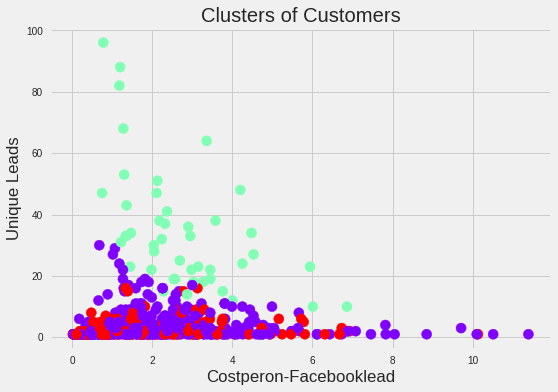

In [ ]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

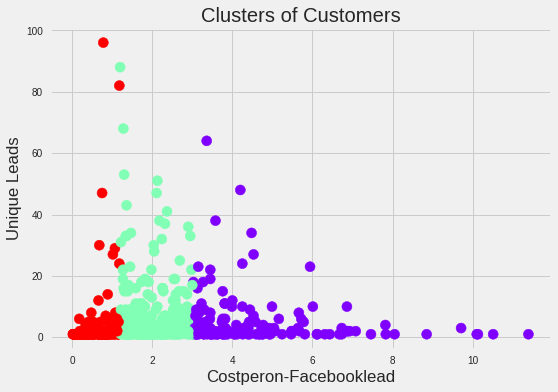

In [ ]:
# Visualiza el cluster entre clicks vs los leads unicos obtenidos con el campo de Clasificacion

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

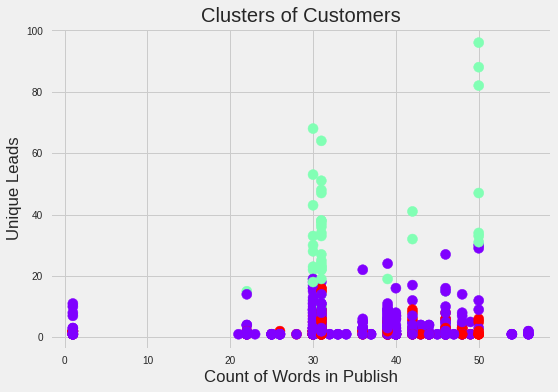

In [ ]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

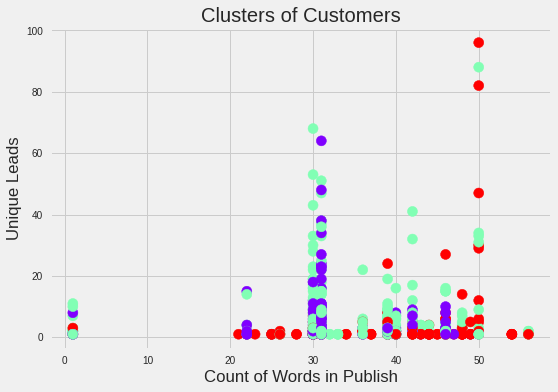

In [ ]:
#Visualizando el cluster: numero de palabras vers los leads unicos

plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['ClasificacionInt'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.


plt.title('Clusters of Customers')
plt.xlabel('Count of Words in Publish')
plt.ylabel('Unique Leads')
plt.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="labels",
                 size='Cost', hover_data=['NumPalabras'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="ClasificacionInt",
                 size='Cost', hover_data=['NumPalabras'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="NumPalabras", y="Uniqueleads", color="ClasificacionInt",
                 size='Cost', hover_data=['Frequency'])
fig.show()

No es muy clara la separación de los clusters, sin embargo se ve que cuando hay 30 palabras en promedio se obtienen un mayor numero de leads, se graficará considerando el costo y la frecuencia de visita usando plotly

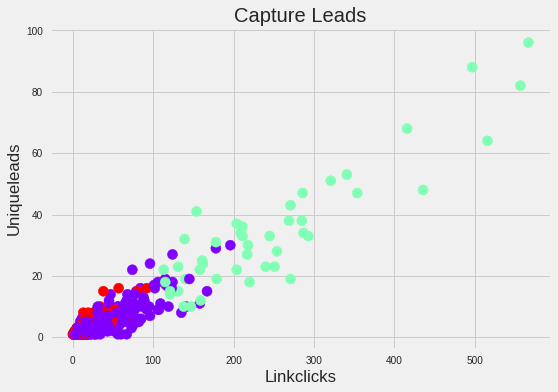

In [ ]:
#6 Visualising the clusters

plt.scatter(data['Linkclicks'], data['Uniqueleads'], s=100, c=data['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Capture Leads')
plt.xlabel('Linkclicks')
plt.ylabel('Uniqueleads')
plt.show()

In [ ]:
df_scaled_features_new.describe()

,Impressions,Linkclicks,Cost,CPM(costper1000impressions),CTR,Reach,Frequency,NumPalabras,NumMessage,NumCaption,Rate,Gender__female,Gender__male,Age__18-24,Age__25-34,Age__35-44,Age__45-54,Age__55-64,Age__65+,Clasificacion__Mejores,Clasificacion__Peores,Clasificacion__Regulares,labels
count,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,5.280000e+02,528.000000
mean,-1.261617e-18,-9.672398e-18,5.109549e-17,6.791705e-17,-2.423356e-17,7.548675e-17,1.198536e-17,4.726859e-16,4.726859e-16,1.053450e-15,3.175070e-17,2.943773e-18,-2.943773e-18,4.527103e-16,-8.074349e-17,-2.859665e-17,3.608225e-16,-5.992681e-17,-1.902939e-17,2.926952e-16,1.192228e-15,3.448420e-17,0.664773
std,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,1.000948e+00,0.896615
min,-5.217471e-01,-5.688555e-01,-5.718043e-01,-1.002396e+00,-6.140602e-01,-5.863845e-01,-1.269557e+00,-3.309979e+00,-3.309979e+00,-2.040836e+00,-2.378628e-01,-6.387488e-01,-1.565561e+00,-4.982238e-01,-7.161662e-01,-6.152967e-01,-3.198382e-01,-2.540003e-01,-1.878673e-01,-5.802662e-01,-5.773503e-01,-9.962193e-01,0.000000
25%,-4.671543e-01,-5.037984e-01,-5.008289e-01,-5.122214e-01,-3.254293e-01,-5.102250e-01,-7.272036e-01,-4.801410e-01,-4.801410e-01,-7.039110e-01,-1.962936e-01,-6.387488e-01,-1.565561e+00,-4.982238e-01,-7.161662e-01,-6.152967e-01,-3.198382e-01,-2.540003e-01,-1.878673e-01,-5.802662e-01,-5.773503e-01,-9.962193e-01,0.000000
50%,-3.458989e-01,-3.866956e-01,-3.769228e-01,-2.395416e-01,-2.117806e-01,-3.592734e-01,-2.526445e-01,-3.825604e-01,-3.825604e-01,-2.582695e-01,-1.601350e-01,-6.387488e-01,6.387488e-01,-4.982238e-01,-7.161662e-01,-6.152967e-01,-3.198382e-01,-2.540003e-01,-1.878673e-01,-5.802662e-01,-5.773503e-01,-9.962193e-01,0.000000
75%,2.152358e-02,3.647142e-03,3.539578e-02,2.830946e-01,4.427018e-02,8.493336e-02,4.535446e-01,6.908265e-01,6.908265e-01,6.330135e-01,-8.014042e-02,1.565561e+00,6.387488e-01,-4.982238e-01,1.396324e+00,1.625232e+00,-3.198382e-01,-2.540003e-01,-1.878673e-01,1.723347e+00,-5.551115e-17,1.003795e+00,2.000000
max,9.495574e+00,6.808622e+00,8.047890e+00,1.636471e+01,1.636779e+01,8.628640e+00,5.283878e+00,2.056955e+00,2.056955e+00,1.524297e+00,1.856964e+01,1.565561e+00,6.387488e-01,2.007130e+00,1.396324e+00,1.625232e+00,3.126581e+00,3.937004e+00,5.322906e+00,1.723347e+00,1.732051e+00,1.003795e+00,2.000000


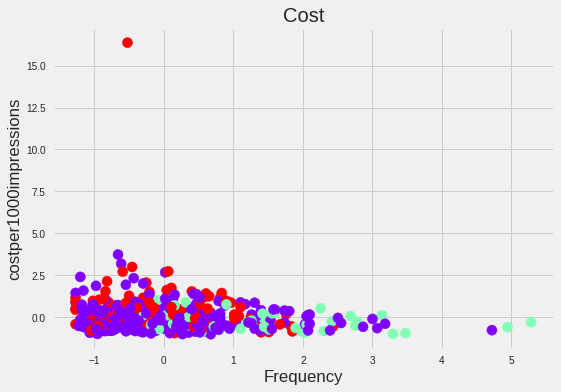

In [ ]:
#6 Visualising the clusters

plt.scatter(df_scaled_features_new['Frequency'], df_scaled_features_new['CPM(costper1000impressions)'], s=100, c=df_scaled_features_new['labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

plt.title('Cost')
plt.xlabel('Frequency')
plt.ylabel('costper1000impressions')
plt.show()

**Grafico de Cluster - Plotly relacion Clicks y Unique Leads**

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="Cost", y="Uniqueleads", color="labels",
                 size='Reach', hover_data=['Linkclicks'])
fig.show()

**Coeficiente de silhohouette**

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

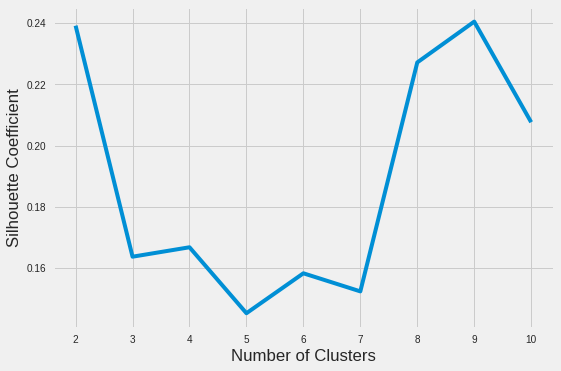

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##Cluster Jerárquico##

In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
#from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
list_cols = numerical_columns
list_cols

['Impressions',
 'Linkclicks',
 'Cost',
 'CPM(costper1000impressions)',
 'CTR',
 'Reach',
 'Frequency',
 'NumPalabras',
 'NumMessage',
 'NumCaption',
 'Rate']

In [ ]:
# Select the ones you want
df_features = data[list_cols]

In [ ]:
data.shape

(528, 40)

In [ ]:
featureset = df_features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.00150061, 0.00529101, 0.00139561, 0.02504673, 0.05309735,
        0.0028192 , 0.05862069, 0.43636364, 0.43636364, 0.625     ,
        0.01485753],
       [0.03112072, 0.02469136, 0.02130629, 0.00934579, 0.01215278,
        0.03742117, 0.28275862, 0.85454545, 0.85454545, 0.125     ,
        0.00286949],
       [0.01179532, 0.00705467, 0.0169799 , 0.05046729, 0.00914808,
        0.0173455 , 0.16896552, 0.85454545, 0.85454545, 0.125     ,
        0.00442567],
       [0.1077937 , 0.1287478 , 0.09764607, 0.02130841, 0.01830606,
        0.13886787, 0.24137931, 0.85454545, 0.85454545, 0.125     ,
        0.00186799],
       [0.00534676, 0.01763668, 0.00893189, 0.06317757, 0.05031447,
        0.00761184, 0.1862069 , 0.85454545, 0.85454545, 0.125     ,
        0.01675667]])

In [ ]:
feature_mtx.shape

(528, 11)

In [ ]:
#Clustering con scikit-learn
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.80926141 0.78433258 ... 0.3810105  0.50467487 0.50440403]
 [0.80926141 0.         0.12552917 ... 0.44565365 0.38545964 0.38196752]
 [0.78433258 0.12552917 0.         ... 0.40646833 0.32539909 0.32199599]
 ...
 [0.3810105  0.44565365 0.40646833 ... 0.         0.17045861 0.16131482]
 [0.50467487 0.38545964 0.32539909 ... 0.17045861 0.         0.04771675]
 [0.50440403 0.38196752 0.32199599 ... 0.16131482 0.04771675 0.        ]]


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
data['a_cluster_'] = agglom.labels_
data.head()

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt,labels,a_cluster_
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2,0,0
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1,0,0
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1,2,0
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1,0,0
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2,2,0


In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

In [ ]:
cluster_labels

[0, 1, 2, 3]

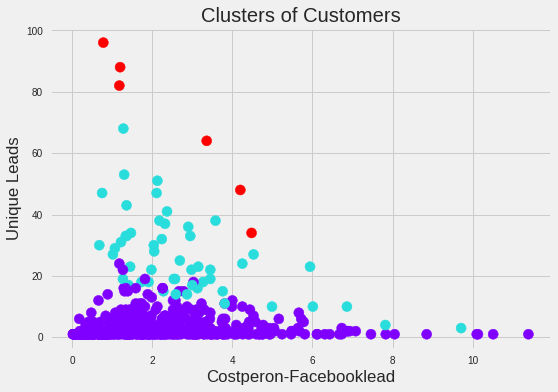

In [ ]:



# Visualiza el cluster entre clicks vs los leads unicos obtenidos

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['a_cluster_'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

In [ ]:
data.NumPalabras.head(10)

3     25
13    48
15    48
16    48
18    48
19    48
22    40
24    40
25    40
28    40
Name: NumPalabras, dtype: int64

In [ ]:
data.dtypes

Year                             int64
Year&month                      object
CampaignID                       int64
Campaignname                    object
Campaignobjective               object
AdsetID                          int64
Adsetname                       object
AdID                             int64
Adname                          object
Promotedposttype                object
Promotedpostcreateddate          int64
Promotedpostdescription         object
Promotedpostmessage             object
Promotedpostcaption             object
Adsetstarttime                   int64
Adsetendtime                   float64
Adsettargeting                  object
Targetingminimumage              int64
Targetingmaximumage              int64
Age                             object
Gender                          object
Cost                           float64
Impressions                      int64
Reach                            int64
Frequency                      float64
Linkclicks               

In [ ]:
data.groupby(['a_cluster_','Age'])['a_cluster_'].count()

a_cluster_  Age  
0           18-24     97
            25-34    154
            35-44    126
            45-54     42
            55-64     31
            65+       18
1           18-24      8
            25-34     20
            35-44     18
            45-54      7
2           55-64      1
3           25-34      5
            35-44      1
Name: a_cluster_, dtype: int64

In [ ]:
data.groupby(['a_cluster_','Age'])['a_cluster_'].count()

agg_cars = data.groupby(['a_cluster_','Age'])['NumPalabras','NumCaption','NumMessage','Cost'].mean()
agg_cars

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



NumPalabras  NumCaption  NumMessage        Cost
a_cluster_ Age                                                   
0          18-24    35.536082    5.329897   35.536082    5.158454
           25-34    35.584416    5.038961   35.584416    8.670974
           35-44    35.015873    5.150794   35.015873    8.527857
           45-54    32.761905    6.023810   32.761905    6.919762
           55-64    34.225806    6.290323   34.225806    8.807419
           65+      31.722222    6.333333   31.722222    4.310000
1          18-24    37.875000    7.000000   37.875000   33.267500
           25-34    33.300000    7.300000   33.300000   65.571500
           35-44    34.500000    7.611111   34.500000   66.135000
           45-54    30.571429    8.142857   30.571429   53.480000
2          55-64    44.000000    4.000000   44.000000    0.110000
3          25-34    42.400000    6.600000   42.400000  128.826000
           35-44    31.000000    9.000000   31.000000  201.680000

In [ ]:

import scipy
leng = feature_mtx.shape[0]
leng
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead



In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



In [ ]:
Z

array([[4.34000000e+02, 4.35000000e+02, 3.56007337e-02, 2.00000000e+00],
       [2.37000000e+02, 3.67000000e+02, 4.15503923e-02, 2.00000000e+00],
       [5.11000000e+02, 5.12000000e+02, 4.37858135e-02, 2.00000000e+00],
       ...,
       [1.04100000e+03, 1.04700000e+03, 1.43632579e+01, 7.00000000e+00],
       [1.05000000e+03, 1.05100000e+03, 2.05356667e+01, 5.21000000e+02],
       [1.05200000e+03, 1.05300000e+03, 3.59553360e+01, 5.28000000e+02]])

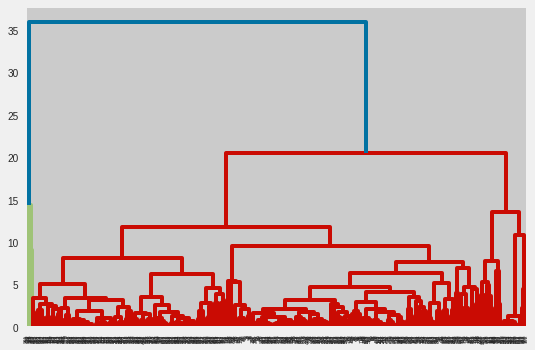

In [ ]:
dendro = hierarchy.dendrogram(Z)

In [ ]:
fig = pylab.figure( figsize=(30,50))
def llf(id):
    return '[%s %s %s]' % ( data['Promotedposttype'][id], data['Gender'][id] , data['Age'][id] ) 
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

KeyError: ignored

<Figure size 2160x3600 with 0 Axes>

## DBSCAN ##

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

In [ ]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [ ]:
X, y = createDataPoints([[5,3], [2,-1], [-6,4]] , 1500, 1.0)

In [ ]:
feature_mtx[:5]
X=feature_mtx
X.shape

(528, 11)

In [ ]:
feature_mtx[:5]

array([[0.00150061, 0.00529101, 0.00139561, 0.02504673, 0.05309735,
        0.0028192 , 0.05862069, 0.43636364, 0.43636364, 0.625     ,
        0.01485753],
       [0.03112072, 0.02469136, 0.02130629, 0.00934579, 0.01215278,
        0.03742117, 0.28275862, 0.85454545, 0.85454545, 0.125     ,
        0.00286949],
       [0.01179532, 0.00705467, 0.0169799 , 0.05046729, 0.00914808,
        0.0173455 , 0.16896552, 0.85454545, 0.85454545, 0.125     ,
        0.00442567],
       [0.1077937 , 0.1287478 , 0.09764607, 0.02130841, 0.01830606,
        0.13886787, 0.24137931, 0.85454545, 0.85454545, 0.125     ,
        0.00186799],
       [0.00534676, 0.01763668, 0.00893189, 0.06317757, 0.05031447,
        0.00761184, 0.1862069 , 0.85454545, 0.85454545, 0.125     ,
        0.01675667]])

In [ ]:
data.shape

(528, 42)

In [ ]:
epsilon = 0.12
minimumSamples = 14
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(feature_mtx)
labels = db.labels_
labels
labels.shape

(528,)

In [ ]:
data.shape

(528, 42)

In [ ]:
data['dbscan_labels'] = labels

In [ ]:
data.head(5)

,Year,Year&month,CampaignID,Campaignname,Campaignobjective,AdsetID,Adsetname,AdID,Adname,Promotedposttype,Promotedpostcreateddate,Promotedpostdescription,Promotedpostmessage,Promotedpostcaption,Adsetstarttime,Adsetendtime,Adsettargeting,Targetingminimumage,Targetingmaximumage,Age,Gender,Cost,Impressions,Reach,Frequency,Linkclicks,Uniqueleads,CPM(costper1000impressions),Costperon-Facebooklead,Month,CTR,NumPalabras,Message,Caption,NumMessage,NumCaption,Rate,Clasificacion,ClasificacionInt,labels,a_cluster_,dbscan_labels
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,1,1.327434,25,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,25,6,0.005181,Mejores,2,0,0,-1
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,0.303819,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001188,Regulares,1,0,0,-1
15,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,3.67,1749,1172,1.49,4,2,2.10,1.84,1,0.228702,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.001706,Regulares,1,2,0,-1
16,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,21.01,15951,9362,1.70,73,8,1.32,2.63,1,0.457652,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.000855,Regulares,1,0,0,-1
18,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,1.94,795,516,1.54,10,3,2.44,0.65,1,1.257862,48,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,48,2,0.005814,Mejores,2,2,0,-1


In [ ]:
# Primero creamos un arreglo para los labels
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask.shape

(528,)

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

4

In [ ]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

In [ ]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.52733564, 0.8106113 , 0.64521338, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

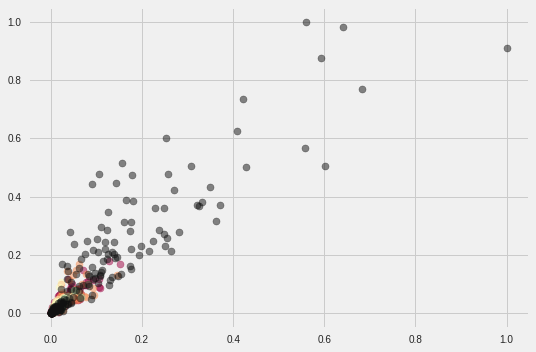

In [ ]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5) 

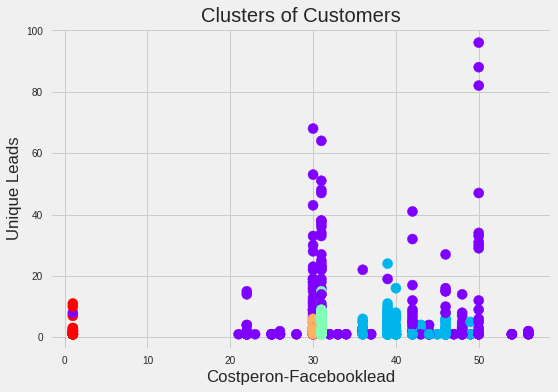

In [ ]:

# Visualiza el cluster entre clicks vs los leads unicos obtenidos

#plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['dbscan_labels'], cmap='rainbow')
plt.scatter(data['NumPalabras'], data['Uniqueleads'], s=100, c=data['dbscan_labels'], cmap='rainbow')
#NumPalabras

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

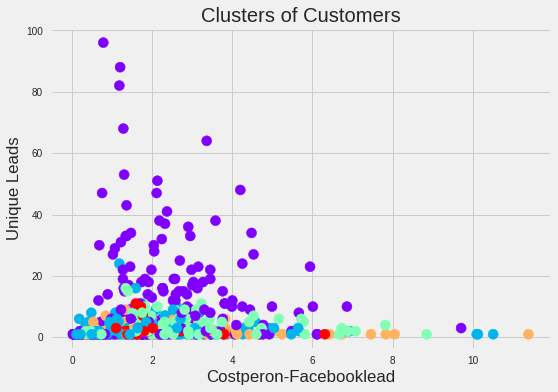

In [ ]:


# Visualiza el cluster entre clicks vs los leads unicos obtenidos

plt.scatter(data['Costperon-Facebooklead'], data['Uniqueleads'], s=100, c=data['dbscan_labels'], cmap='rainbow')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Costperon-Facebooklead')
plt.ylabel('Unique Leads')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="Cost", y="Uniqueleads", color="dbscan_labels",
                 size='Reach', hover_data=['Linkclicks'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x='Costperon-Facebooklead', y="Uniqueleads", color="dbscan_labels",
                 size='Reach', hover_data=['Linkclicks'])
fig.show()

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
x <- seq(0, 2*pi, length.out=50)
x

 [1] 0.0000000 0.1282283 0.2564565 0.3846848 0.5129131 0.6411414 0.7693696
 [8] 0.8975979 1.0258262 1.1540544 1.2822827 1.4105110 1.5387393 1.6669675
[15] 1.7951958 1.9234241 2.0516523 2.1798806 2.3081089 2.4363372 2.5645654
[22] 2.6927937 2.8210220 2.9492502 3.0774785 3.2057068 3.3339351 3.4621633
[29] 3.5903916 3.7186199 3.8468481 3.9750764 4.1033047 4.2315330 4.3597612
[36] 4.4879895 4.6162178 4.7444460 4.8726743 5.0009026 5.1291309 5.2573591
[43] 5.3855874 5.5138157 5.6420439 5.7702722 5.8985005 6.0267288 6.1549570
[50] 6.2831853


In [ ]:
%%R
print(installed.packages())

              Package         LibPath                         Version   
IRdisplay     "IRdisplay"     "/usr/local/lib/R/site-library" "1.0"     
IRkernel      "IRkernel"      "/usr/local/lib/R/site-library" "1.2"     
pbdZMQ        "pbdZMQ"        "/usr/local/lib/R/site-library" "0.3-5"   
repr          "repr"          "/usr/local/lib/R/site-library" "1.1.3"   
askpass       "askpass"       "/usr/lib/R/site-library"       "1.1"     
assertthat    "assertthat"    "/usr/lib/R/site-library"       "0.2.1"   
backports     "backports"     "/usr/lib/R/site-library"       "1.2.1"   
base64enc     "base64enc"     "/usr/lib/R/site-library"       "0.1-3"   
BH            "BH"            "/usr/lib/R/site-library"       "1.75.0-0"
blob          "blob"          "/usr/lib/R/site-library"       "1.2.1"   
brew          "brew"          "/usr/lib/R/site-library"       "1.0-6"   
brio          "brio"          "/usr/lib/R/site-library"       "1.1.2"   
broom         "broom"         "/usr/lib/R/site-libr

In [ ]:
%%R
install.packages("NbClust")
library(NbClust)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/NbClust_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22211 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [ ]:
%%R

library(NbClust)

In [ ]:
%%R

sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] NbClust_3.0

loaded via a namespace (and not attached):
[1] compiler_4.1.0


In [ ]:
%%R
install.packages("car") 

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.59.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 194487 bytes (189 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]

In [ ]:
%%R
install.packages("factoextra")
library(factoextra)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘lazyeval’, ‘later’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lazyeval_0.2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83482 bytes (81 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

# Prediccion  Regression

https://www.kaggle.com/mansimeena/facebook-ad-campaigns-analysis-sales-prediction

https://www.kaggle.com/gauravduttakiit/predicting-stock-prices-using-facebook-s-prophet (Graficas)

https://www.kaggle.com/ymlai87416/web-traffic-time-series-forecast-with-4-model (Entendimiento)

https://www.kaggle.com/zoupet/predictive-analysis-with-different-approaches

https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

# OTROS: Analisis de comentarios (si alcanzamos) 

https://www.kaggle.com/mortena/facebook-comments-sentiment-analysis